In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# <span style="font-size:1.2em;">Pré-Processamento</span>

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.head() #recolha de informacao sobre os 5 primeiros id's do dataset


,id,tipo,ano_registo,caixa,potencia,km,combustivel,marca,com_danos,preco
0,26713,limousine,2014,manual,140,40800,gasolina,outra,nao,14200
1,49553,limousine,2013,manual,184,30300,diesel,bmw,nao,25840
2,9007,coupe,2009,manual,177,150900,diesel,bmw,nao,9990
3,21152,compacto,2006,manual,54,150500,gasolina,volkswagen,nao,3250
4,37819,limousine,2015,manual,150,40600,diesel,volkswagen,nao,16939


Apresentação de valores nulos nas colunas, informações sobre o conjunto de dados etc..

In [3]:

print(dataset.isnull().sum())
dataset.info()
print(dataset.head())
print(dataset.columns)



id             0
tipo           0
ano_registo    0
caixa          0
potencia       0
km             0
combustivel    0
marca          0
com_danos      0
preco          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           25000 non-null  int64 
 1   tipo         25000 non-null  object
 2   ano_registo  25000 non-null  int64 
 3   caixa        25000 non-null  object
 4   potencia     25000 non-null  int64 
 5   km           25000 non-null  int64 
 6   combustivel  25000 non-null  object
 7   marca        25000 non-null  object
 8   com_danos    25000 non-null  object
 9   preco        25000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.9+ MB
      id       tipo  ano_registo   caixa  potencia      km combustivel  \
0  26713  limousine         2014  manual       140   40800    gasolina   
1  49553  limousin

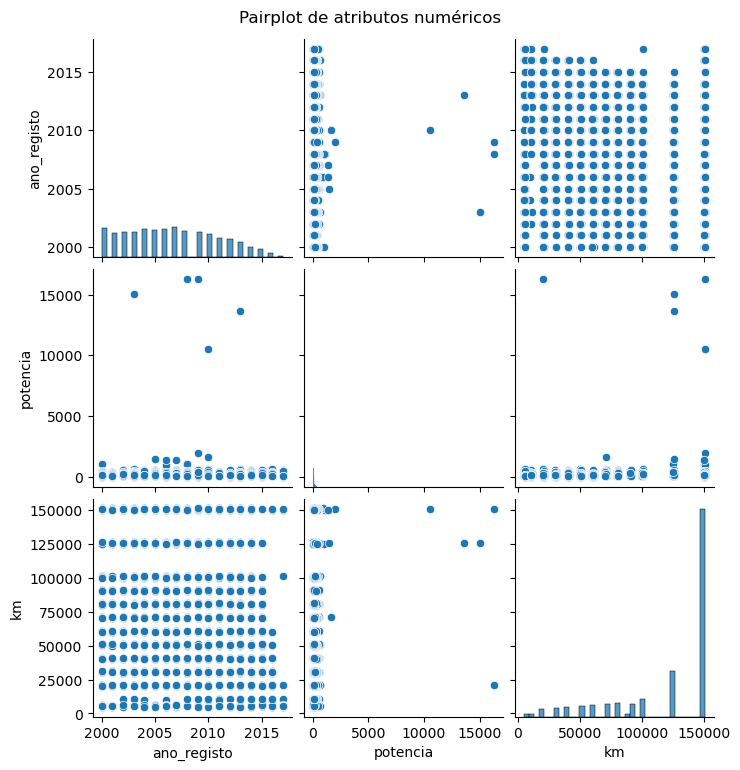

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#selecao de alguns valores numericos para visualizacao grafica
numericos_variaveis = ['ano_registo', 'potencia', 'km']

# criação de um "pairplot" , ajuda-nos a criar relacoes par entre variaveis num dataset para melhor entendimento das "features"
sns.pairplot(dataset[numericos_variaveis])
plt.suptitle('Pairplot de atributos numéricos', y=1.02)
plt.show()

Observação da distribuição de 2 "features" que poderão ser relevantes(caixa/tipo)

Valores Unicos em 'tipo':
['limousine' 'coupe' 'compacto' 'kombi' 'carrinha' 'suv' 'cabrio' 'outro']

Valores unicos em 'caixa':
['manual' 'automatica']


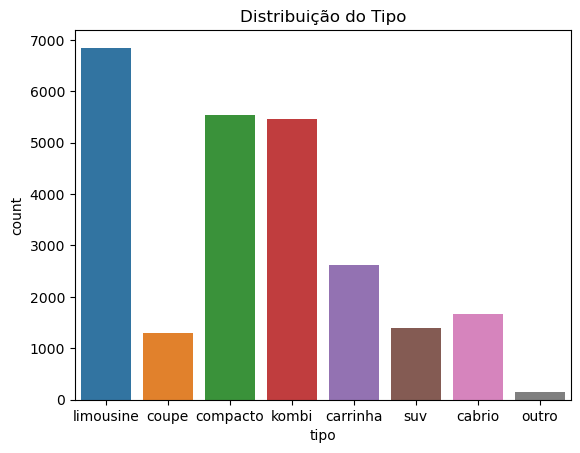

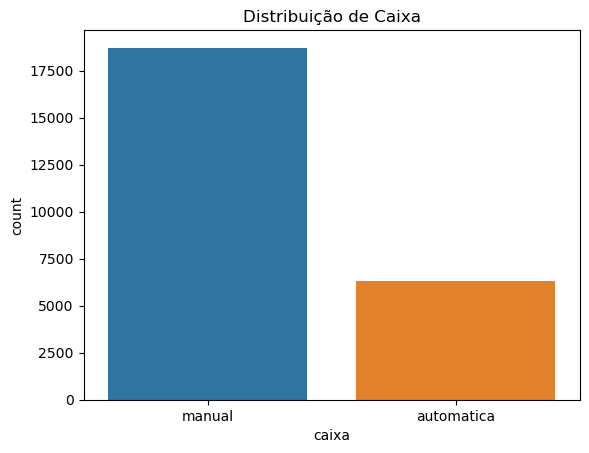

In [5]:
# Explorar valores unicos em tipos de dados objeto 
print("Valores Unicos em 'tipo':")
print(dataset['tipo'].unique())

print("\nValores unicos em 'caixa':")
print(dataset['caixa'].unique())

# visualizacao da distribuicao grafica para tipo
sns.countplot(x='tipo', data=dataset)
plt.title('Distribuição do Tipo')
plt.show()
# visualizacao da distribuicao grafica para caixa
sns.countplot(x='caixa', data=dataset)
plt.title('Distribuição de Caixa')
plt.show()

### <span style="font-size:0.8em;">Observa-se algum desequilíbrio relativamente á quantidade de carros com caixas automáticas no dataset</span>

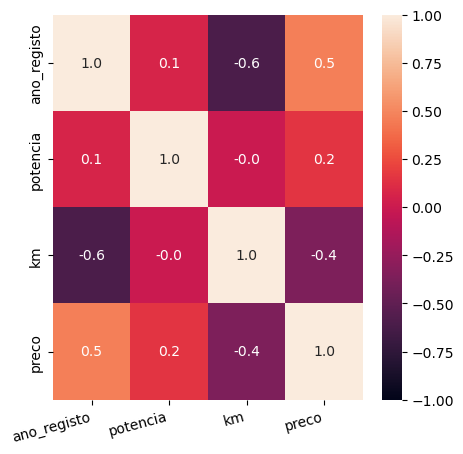

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlacao = dataset.drop(['id'], axis=1).corr()

g = sns.heatmap(correlacao, xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=-1, vmax=1)

g.figure.set_size_inches(5, 5)
g.set_xticklabels(g.get_xticklabels(), rotation=15, horizontalalignment='right')

plt.show()


### <span style="font-size:0.8em;">Observa-se uma alta correlação entre a feature "km" e a feature "ano-registo" logo iremos mais á frente usar a "feature engineering" para criarmos uma nova feature que combine ambas</span>


# <span style="font-size:1.2em;">One-Hot Encoding para tipo e caixa </span>

In [7]:
dataset = pd.get_dummies(dataset, columns=['tipo', 'caixa'], prefix=['tipo', 'caixa']) #representação das variaveis categoricas tipo e caixa como vetores binários.

# <span style="font-size:1.2em;">Matriz de correlação </span>

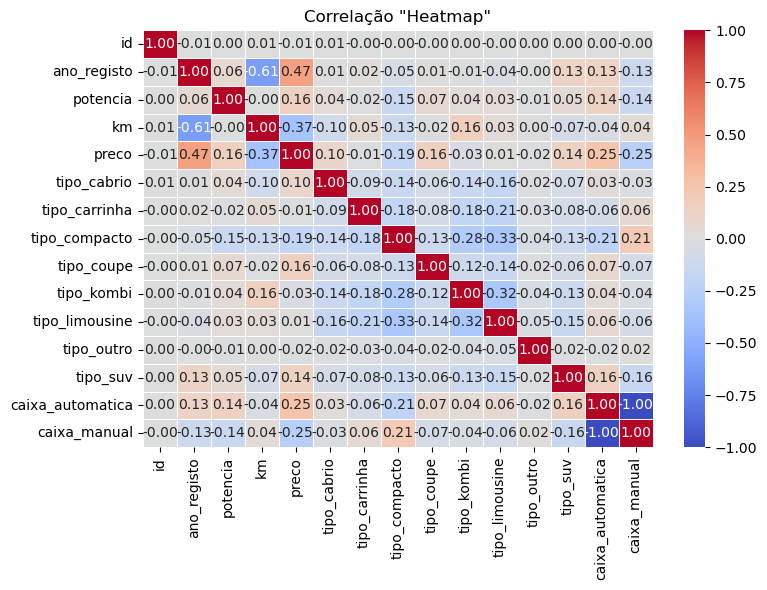

In [8]:

correlacao_matriz = dataset.corr()
plt.figure(figsize=(8, 6)) 


sns.heatmap(correlacao_matriz, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação "Heatmap"')
plt.tight_layout()
plt.show()


### <span style="font-size:0.8em;">Para além da alta correlação entre a feature "km" e a feature "ano-registo" previamente observada, observa-se também alguma correlação entre "km" e "preco" no entanto não tão relevante como "km" e "ano-registo"</span>

# <span style="font-size:1.2em;">Feature Engineering</span>

In [9]:
dataset['idade'] = 2024 - dataset['ano_registo'] #criamos um novo atributo para melhor entendimento sobre a "idade" do carro

dataset['km_por_ano'] = dataset['km'] / (2024 - dataset['ano_registo']) #criação de um novo feature devido á ma correlacao entre as variaveis previamente observadas 

#dataset com as novas variáveis
print(dataset.head())

      id  ano_registo  potencia      km combustivel       marca com_danos  \
0  26713         2014       140   40800    gasolina       outra       nao   
1  49553         2013       184   30300      diesel         bmw       nao   
2   9007         2009       177  150900      diesel         bmw       nao   
3  21152         2006        54  150500    gasolina  volkswagen       nao   
4  37819         2015       150   40600      diesel  volkswagen       nao   

   preco  tipo_cabrio  tipo_carrinha  tipo_compacto  tipo_coupe  tipo_kombi  \
0  14200            0              0              0           0           0   
1  25840            0              0              0           0           0   
2   9990            0              0              0           1           0   
3   3250            0              0              1           0           0   
4  16939            0              0              0           0           0   

   tipo_limousine  tipo_outro  tipo_suv  caixa_automatica  cai

# <span style="font-size:1.2em;">Binning</span>

In [10]:
import numpy as np

# Example: agrupar idade no sentido de que substitui valores contidos em intervalos para possivel melhor precisão.
bins = [0, 3, 5, 10, 20, np.inf]
labels = ['0-3 anos', '3-5 anos', '5-10 anos', '10-20 anos', '20+ anos']
dataset['idade_bins'] = pd.cut(dataset['idade'], bins=bins, labels=labels)



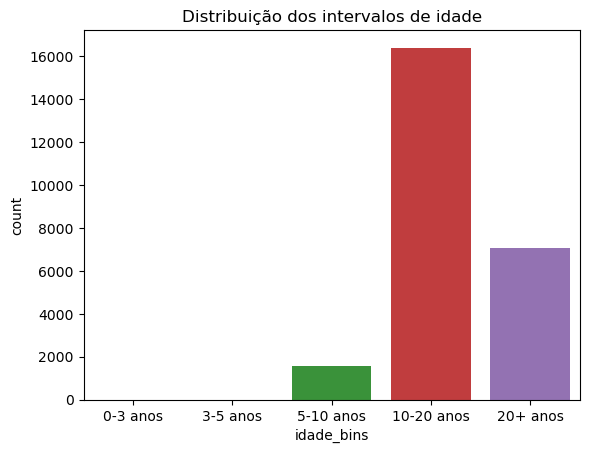

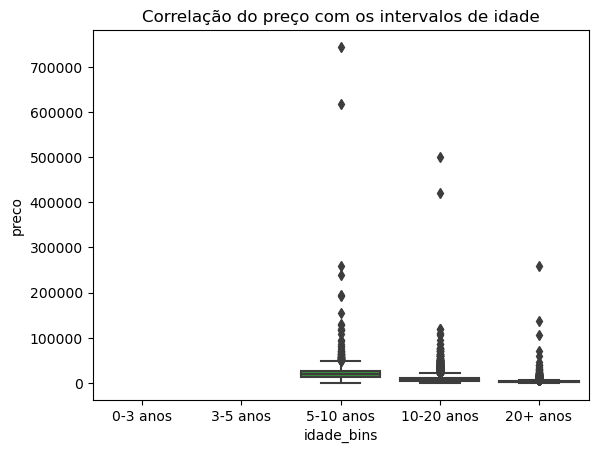

In [11]:
# Example: visualizacao dos intervalos criados para idade do carro
sns.countplot(x='idade_bins', data=dataset)
plt.title('Distribuição dos intervalos de idade')
plt.show()

# Example: Correlacao do novo atributo com preço
sns.boxplot(x='idade_bins', y='preco', data=dataset)
plt.title('Correlação do preço com os intervalos de idade')
plt.show()

# <span style="font-size:1.2em;">Splitting</span>

In [12]:

X = dataset.drop(['preco'], axis=1)
y = dataset['preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


print("Tamanho do X_train:", X_train.shape)
print("Tamanho do X_val:", X_val.shape)
print("Tamanho do X_test:", X_test.shape)


Tamanho do X_train: (20250, 20)
Tamanho do X_val: (2250, 20)
Tamanho do X_test: (2500, 20)


# <span style="font-size:1.2em;">Mais Encoding e Scalling</span>

In [13]:

from sklearn.preprocessing import MinMaxScaler


print(X_train.columns)

# One-hot encoding para mais variaveis categóricas
X_train_encoded = pd.get_dummies(X_train, columns=['tipo_cabrio', 'tipo_carrinha', 'tipo_compacto',
                                                   'tipo_coupe', 'tipo_kombi', 'tipo_limousine', 'tipo_outro',
                                                   'tipo_suv', 'caixa_automatica', 'caixa_manual', 'combustivel',
                                                   'marca', 'com_danos'], drop_first=True)

X_val_encoded = pd.get_dummies(X_val, columns=['tipo_cabrio', 'tipo_carrinha', 'tipo_compacto',
                                               'tipo_coupe', 'tipo_kombi', 'tipo_limousine', 'tipo_outro',
                                               'tipo_suv', 'caixa_automatica', 'caixa_manual', 'combustivel',
                                               'marca', 'com_danos'], drop_first=True)

X_test_encoded = pd.get_dummies(X_test, columns=['tipo_cabrio', 'tipo_carrinha', 'tipo_compacto',
                                                 'tipo_coupe', 'tipo_kombi', 'tipo_limousine', 'tipo_outro',
                                                 'tipo_suv', 'caixa_automatica', 'caixa_manual', 'combustivel',
                                                 'marca', 'com_danos'], drop_first=True)


# One-hot encoding para 'os intervalos de idade do carro"
X_train_encoded = pd.get_dummies(X_train_encoded, columns=['idade_bins'], drop_first=True)
X_val_encoded = pd.get_dummies(X_val_encoded, columns=['idade_bins'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test_encoded, columns=['idade_bins'], drop_first=True)

X_train['km_por_ano'] = X_train['km'] / (2024 - X_train['ano_registo'])
X_val['km_por_ano'] = X_val['km'] / (2024 - X_val['ano_registo'])
X_test['km_por_ano'] = X_test['km'] / (2024 - X_test['ano_registo'])



#variaveis_numericas = ['potencia', 'km', 'idade', 'km_por_ano']

#scaler = MinMaxScaler()
#X_train[variaveis_numericas] = scaler.fit_transform(X_train[variaveis_numericas])
#X_val[variaveis_numericas] = scaler.transform(X_val[variaveis_numericas])
#X_test[variaveis_numericas] = scaler.transform(X_test[variaveis_numericas])

Index(['id', 'ano_registo', 'potencia', 'km', 'combustivel', 'marca',
       'com_danos', 'tipo_cabrio', 'tipo_carrinha', 'tipo_compacto',
       'tipo_coupe', 'tipo_kombi', 'tipo_limousine', 'tipo_outro', 'tipo_suv',
       'caixa_automatica', 'caixa_manual', 'idade', 'km_por_ano',
       'idade_bins'],
      dtype='object')


### <span style="font-size:0.8em;">Observamos que quando usamos o scaling para features numéricas, foram apresentados previsões menos precisas no dataset final onde determinamos o preço dos carros do just_features.csv</span>

# <span style="font-size:1.2em;">Fitting</span>

In [14]:

#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.ensemble import RandomForestRegressor

#Determinação de melhores hiperparametros
#param_dist = {
 #   'n_estimators': [100, 150],
  #  'max_depth': [None, 10],
   ##'min_samples_leaf': [1, 2]
#}

#model = RandomForestRegressor(random_state=42)
#random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=2, cv=5, scoring='r2', random_state=42)
#random_search.fit(X_train_encoded, y_train)

#best_params = random_search.best_params_
#print("Os Melhores Hiperparametros:", best_params)

#Melhor estimador
#model = random_search.best_estimator_

#Fitting do modelo
#model.fit(X_train_encoded, y_train)

### <span style="font-size:0.8em;">Tendo em conta a ferramenta RandomizedSearchCV chegamos á conclusão dos seguintes melhores parâmetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}"</span>

# <span style="font-size:1.2em;">Random Forest</span>

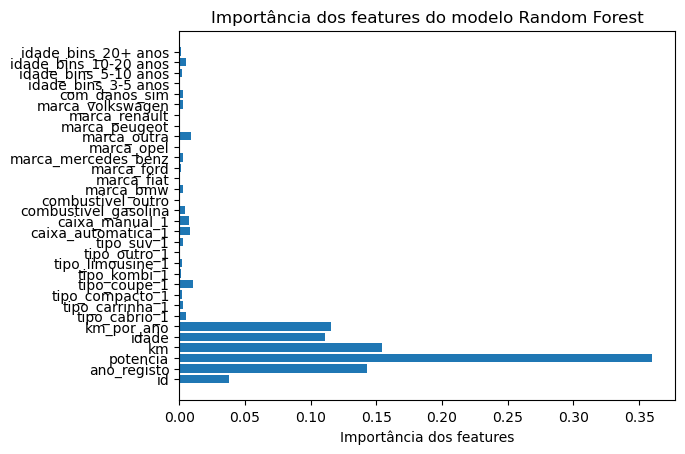

R² no set de treino: 0.9480718456701012
RMSE no set de treino: 2619.42948568387
R² no set de teste: 0.766250361739305
R² no set de validação: 0.6959540172910804
RMSE no set de validação: 8459.652158290834


In [15]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Melhores Hiperparametros obtidos
best_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

# Instantiate the model with the best hyperparameters
model = RandomForestRegressor(random_state=42, **best_params)

# Fitting the model
model.fit(X_train_encoded, y_train)

# Feature importance
feature_importances = model.feature_importances_



import matplotlib.pyplot as plt

plt.barh(X_train_encoded.columns, feature_importances)
plt.xlabel('Importância dos features')
plt.title('Importância dos features do modelo Random Forest')
plt.show()


y_pred_train = model.predict(X_train_encoded)

#metrica r2 
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f'R² no set de treino: {r2_train}')
print(f'RMSE no set de treino: {rmse_train}')


y_pred_val = model.predict(X_val_encoded)


y_pred_test = model.predict(X_test_encoded)


r2_test = r2_score(y_test, y_pred_test)

print("R² no set de teste:", r2_test)

r2_val = r2_score(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

print(f'R² no set de validação: {r2_val}')
print(f'RMSE no set de validação: {rmse_val}')





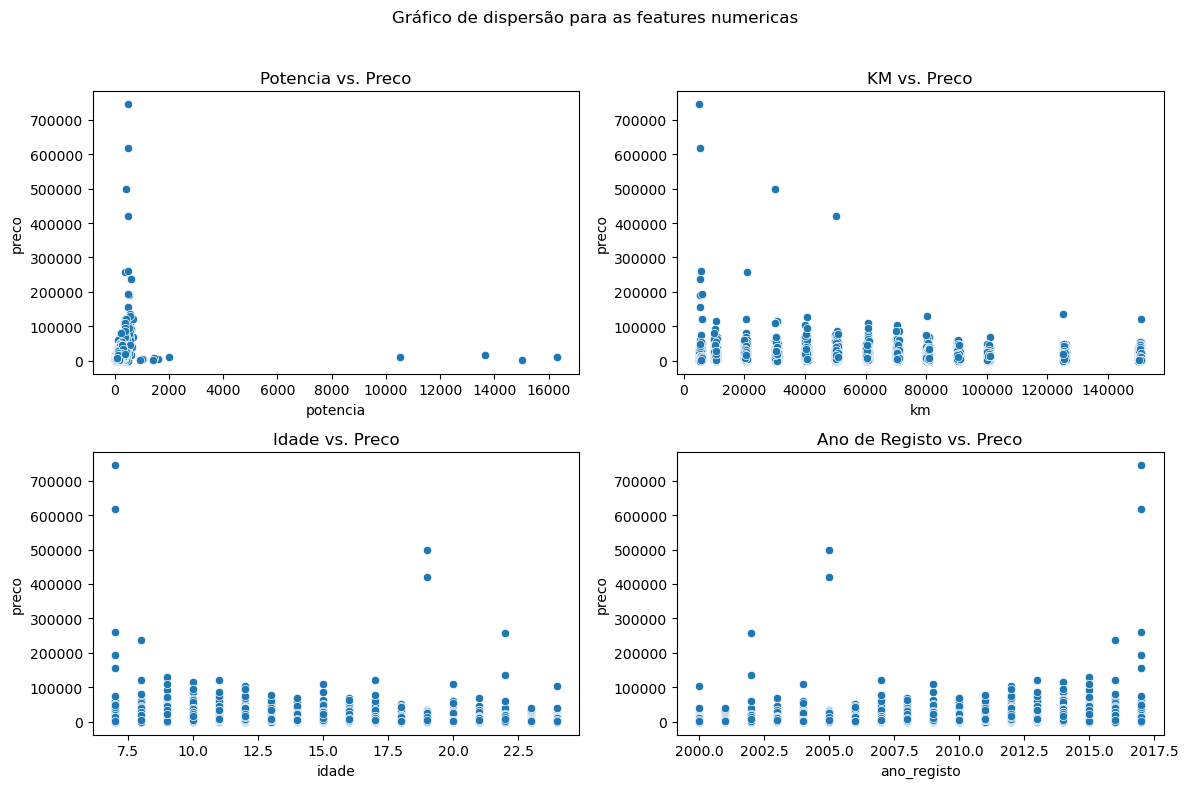

In [16]:

# Algumas comparacoes entre os features com mais influencia 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Gráfico de dispersão para as features numericas')

sns.scatterplot(x='potencia', y='preco', data=dataset, ax=axes[0, 0])
axes[0, 0].set_title('Potencia vs. Preco')

sns.scatterplot(x='km', y='preco', data=dataset, ax=axes[0, 1])
axes[0, 1].set_title('KM vs. Preco')

sns.scatterplot(x='idade', y='preco', data=dataset, ax=axes[1, 0])
axes[1, 0].set_title('Idade vs. Preco')

sns.scatterplot(x='ano_registo', y='preco', data=dataset, ax=axes[1, 1])
axes[1, 1].set_title('Ano de Registo vs. Preco')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Não há muito impacto no preço relativamente aos features com mais influencia

# <span style="font-size:1.2em;">Previsão</span>

In [17]:

precos_previstos = pd.read_csv('just_features.csv')

# informações sobre as novas instâncias do just features
print("Tamanho:", precos_previstos.shape)
print("\nPrimeiras novas instâncias:")
print(precos_previstos.head())

print("\nValores em falta:")
print(precos_previstos.isnull().sum())

#One-hot encoding para as varivaveis categoricas
precos_previstos_encoded = pd.get_dummies(precos_previstos, columns=['tipo', 'caixa', 'combustivel', 'marca', 'com_danos'], drop_first=True)

print("\nColunas na novas instancias depois de one-hot encoding:")
print(precos_previstos_encoded.columns)


Tamanho: (22222, 9)

Primeiras novas instâncias:
      id       tipo  ano_registo       caixa  potencia      km combustivel  \
0  64615   carrinha         2007  automatica       105  150600      diesel   
1  83338   carrinha         2007      manual       174  151000      diesel   
2  26411   compacto         2012      manual        75  100800    gasolina   
3  62530   compacto         2002      manual        75  150300    gasolina   
4  11665  limousine         2010      manual        80   80500    gasolina   

        marca com_danos  
0  volkswagen       nao  
1  volkswagen       nao  
2       outra       nao  
3  volkswagen       nao  
4  volkswagen       nao  

Valores em falta:
id             0
tipo           0
ano_registo    0
caixa          0
potencia       0
km             0
combustivel    0
marca          0
com_danos      0
dtype: int64

Colunas na novas instancias depois de one-hot encoding:
Index(['id', 'ano_registo', 'potencia', 'km', 'tipo_carrinha', 'tipo_compacto',
    

# <span style="font-size:1.2em;">Feature engineering</span>

In [18]:
# Adicionar a coluna "idade" baseada na engenharia de atributos  
precos_previstos_encoded['idade'] = 2024 - precos_previstos_encoded['ano_registo']

precos_previstos_encoded['km_por_ano'] = precos_previstos_encoded['km'] / (2024 - dataset['ano_registo']) #criacao de um novo feature devido á ma correlacao entre as variaveis

# Novas colunas
print("\nColunas nas novas instâncias depois de 'feature engineering':")
print(precos_previstos_encoded.columns)



Colunas nas novas instâncias depois de 'feature engineering':
Index(['id', 'ano_registo', 'potencia', 'km', 'tipo_carrinha', 'tipo_compacto',
       'tipo_coupe', 'tipo_kombi', 'tipo_limousine', 'tipo_outro', 'tipo_suv',
       'caixa_manual', 'combustivel_gasolina', 'combustivel_outro',
       'marca_bmw', 'marca_fiat', 'marca_ford', 'marca_mercedes_benz',
       'marca_opel', 'marca_outra', 'marca_peugeot', 'marca_renault',
       'marca_volkswagen', 'com_danos_sim', 'idade', 'km_por_ano'],
      dtype='object')


In [19]:
#colunas usadas no treino 
training_columns = X_train_encoded.columns
if 'ano_registo' in precos_previstos_encoded.columns:
    precos_previstos_encoded['idade'] = 2024 - precos_previstos_encoded['ano_registo']
else:
    
    print("Error: 'ano_registo' em falta na nova instância.")


training_columns_after_encoding = X_train_encoded.columns
common_columns = set(training_columns_after_encoding) & set(precos_previstos_encoded.columns)
missing_columns = set(training_columns_after_encoding) - set(common_columns)
if missing_columns:
    
    print(f"Colunas que faltam nas novas instancias  - {missing_columns}")
    for col in missing_columns:
        precos_previstos_encoded[col] = 0

missing_columns = {'tipo_suv_1', 'caixa_automatica_1', 'tipo_compacto_1', 'caixa_manual_1', 'idade_bins_20+ anos', 'idade_bins_3-5 anos', 'idade_bins_10-20 anos', 'tipo_limousine_1', 'tipo_carrinha_1', 'idade_bins_5-10 anos', 'tipo_outro_1', 'tipo_coupe_1', 'tipo_cabrio_1', 'tipo_kombi_1'}

for column in missing_columns:
    X_val_encoded[column] = 0  
    X_test_encoded[column] = 0  
# reordenar as colunas para combinar com os preços no treino.
new_instances_features = precos_previstos_encoded[training_columns_after_encoding]
# Previsões feitas com o modelo random forest 
predictions = model.predict(new_instances_features)


result_df = pd.DataFrame({'id': precos_previstos['id'], 'preco': predictions})
result_df.to_csv('precos_estimados.csv', index=False)



Colunas que faltam nas novas instancias  - {'idade_bins_10-20 anos', 'idade_bins_20+ anos', 'idade_bins_3-5 anos', 'tipo_kombi_1', 'tipo_outro_1', 'tipo_suv_1', 'tipo_coupe_1', 'idade_bins_5-10 anos', 'caixa_manual_1', 'tipo_carrinha_1', 'tipo_limousine_1', 'tipo_cabrio_1', 'tipo_compacto_1', 'caixa_automatica_1'}
